<a href="https://colab.research.google.com/github/Kishanmvs/MachineLearningLabWork/blob/main/Lab5-LinearRidgeLasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Linear Regression Results:
R2 Score: 0.16604314438282972
RMSE: 14.049120708201258


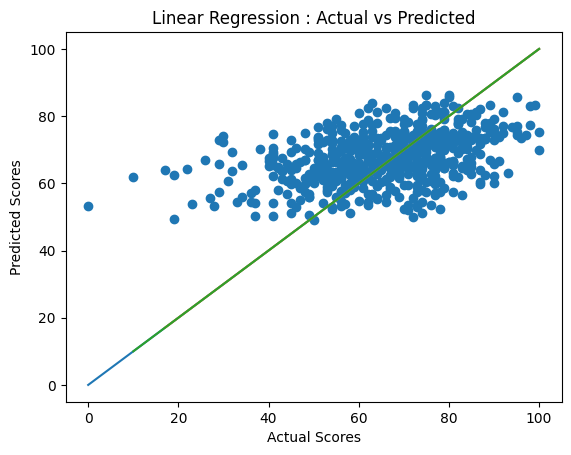


Ridge Regression Results:
R2 Score: 0.16611787202548609
RMSE: 14.048487943958285


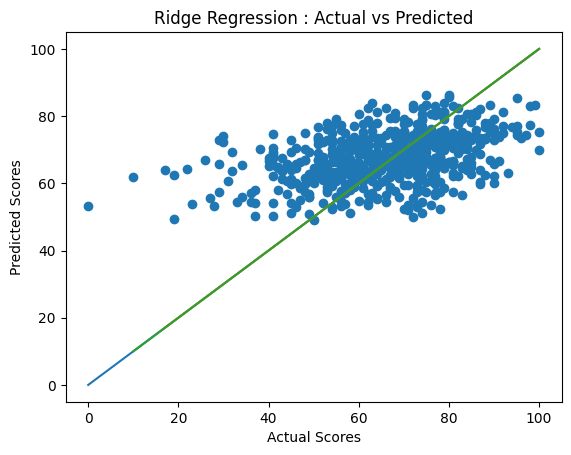


Lasso Regression Results:
R2 Score: 0.16625446263206922
RMSE: 14.047345473206004


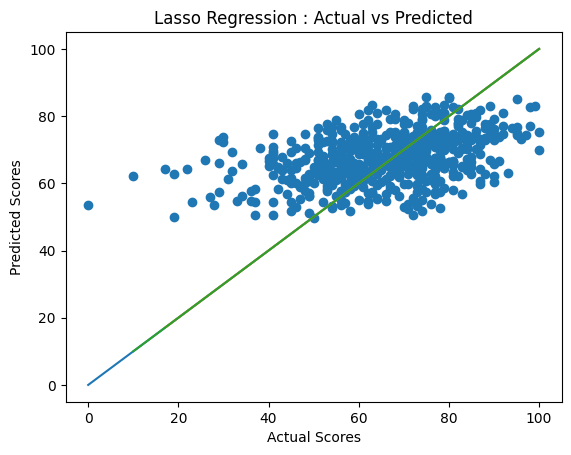

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("StudentsPerformance.csv")

# Encode categorical columns
categorical_cols = ["gender", "race/ethnicity", "parental level of education",
                    "lunch", "test preparation course"]

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Features and target
X = df[categorical_cols]
y = df[["math score", "reading score", "writing score"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

# Train, evaluate & plot
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Results:")
    print("R2 Score:", r2_score(y_test, y_pred, multioutput='uniform_average'))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

    # ---- Plot Graph ----
    plt.figure()
    plt.scatter(y_test.values.flatten(), y_pred.flatten())
    plt.plot([y.min(), y.max()], [y.min(), y.max()])  # Ideal line
    plt.xlabel("Actual Scores")
    plt.ylabel("Predicted Scores")
    plt.title(f"{name} : Actual vs Predicted")
    plt.show()
